In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/c6/_p5br7tn1xj6tjc5l7wfj5nw0000gn/T/ipykernel_65097/720521909.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2 = sns.distplot(normal, ax=axs[1])


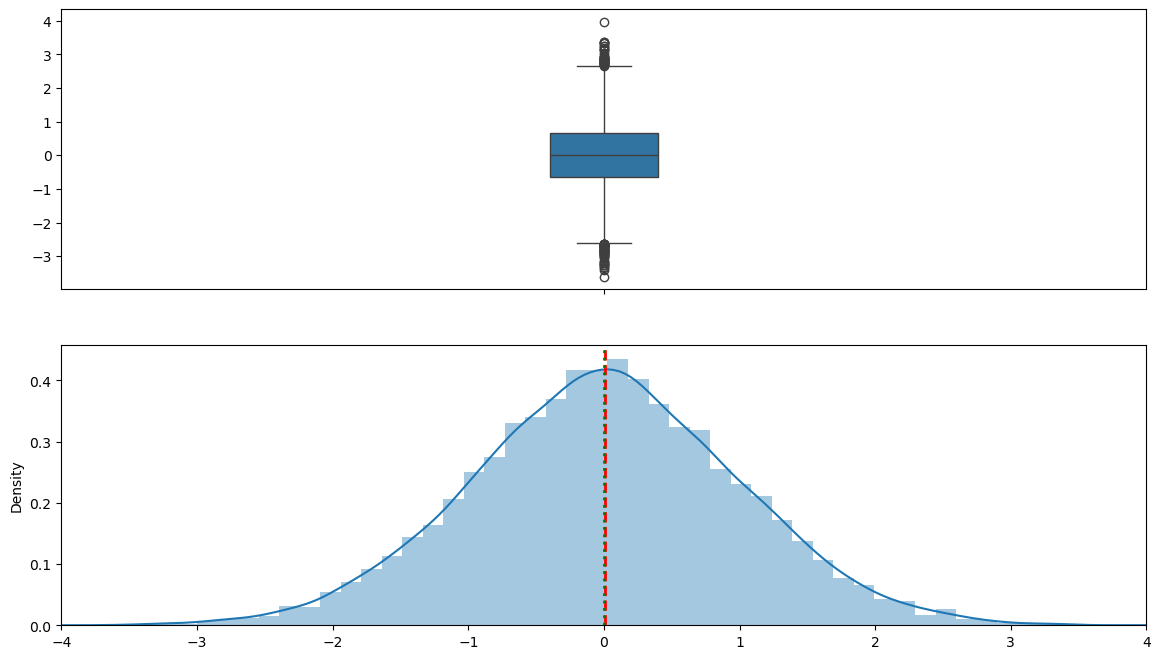

In [14]:
normal = np.random.normal(0, 1, 10000) # loc, scale, size
quartiles = pd.DataFrame(normal).quantile([0.25, 0.5, 0.75, 1])[0]
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)
# Boxplot of Normal distribution
plot1 = sns.boxplot(normal, ax=axs[0])
plot1.set(xlim=(-4, 4))
# Normal distribution
plot2 = sns.distplot(normal, ax=axs[1])
plot2.set(xlim=(-4, 4))
# Median line
plt.axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2)
for i, q in enumerate(quartiles):
    # Quartile i line
    plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

In [10]:
#Print normal distribution statistics
print('Mean: ', np.mean(normal))
print('Median: ', np.median(normal))
print('Q1: ', quartiles[0.25])
print('Q2: ', quartiles[0.5])
print('Q3: ', quartiles[0.75])
print('Min: ', np.min(normal))
print('Max: ', np.max(normal))
print('Std: ', np.std(normal))
print('Variance: ', np.var(normal))
plt.show()

Mean:  -0.0010690095304617343
Median:  0.010252894567697174
Q1:  -0.6799291748875528
Q2:  0.010252894567697174
Q3:  0.6826577798604414
Min:  -3.73644128996704
Max:  3.630968570244374
Std:  1.0084135371016039
Variance:  1.0168978618097677


<Axes: >

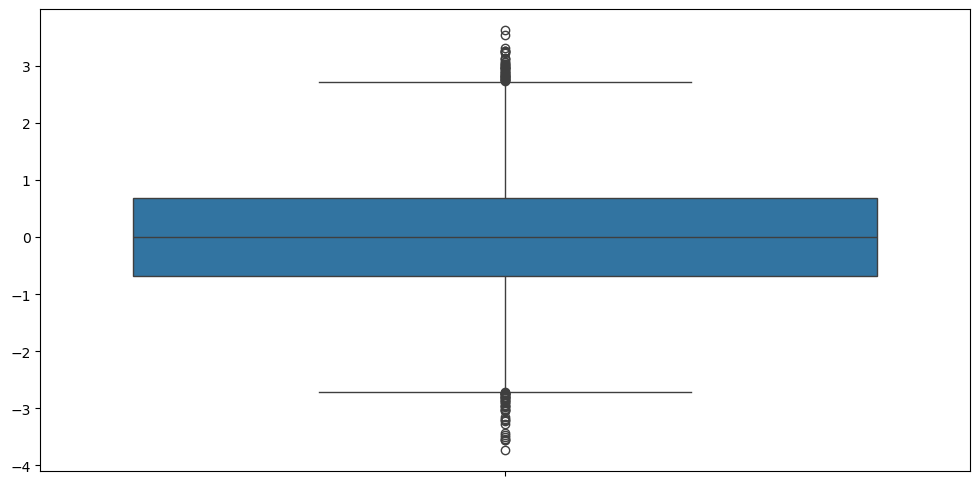

In [3]:
plt.figure(figsize=(12,6))
sns.boxplot(normal)

<Axes: >

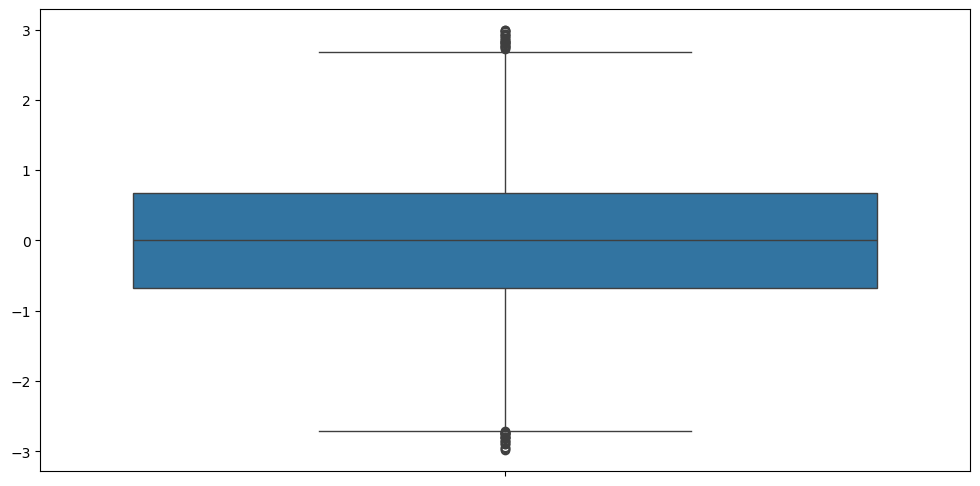

In [5]:
normal[(normal >= -3) & (normal <= 3)]
plt.figure(figsize=(12,6))
sns.boxplot(normal[(normal >= -3) & (normal <= 3)])

In [6]:
q1 = pd.DataFrame(normal).quantile(0.25)[0]
q3 = pd.DataFrame(normal).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print(f'Q1: {q1}, Q3: {q3}, IQR: {iqr}, Fence Low: {fence_low}, Fence High: {fence_high}')

Q1: -0.6799291748875528, Q3: 0.6826577798604414, IQR: 1.3625869547479943, Fence Low: -2.723809607009544, Fence High: 2.7265382119824326


In [7]:
# "Outside" boxplot Reviews
normal[(normal < fence_low) | (normal > fence_high)].shape[0]

83

<Axes: >

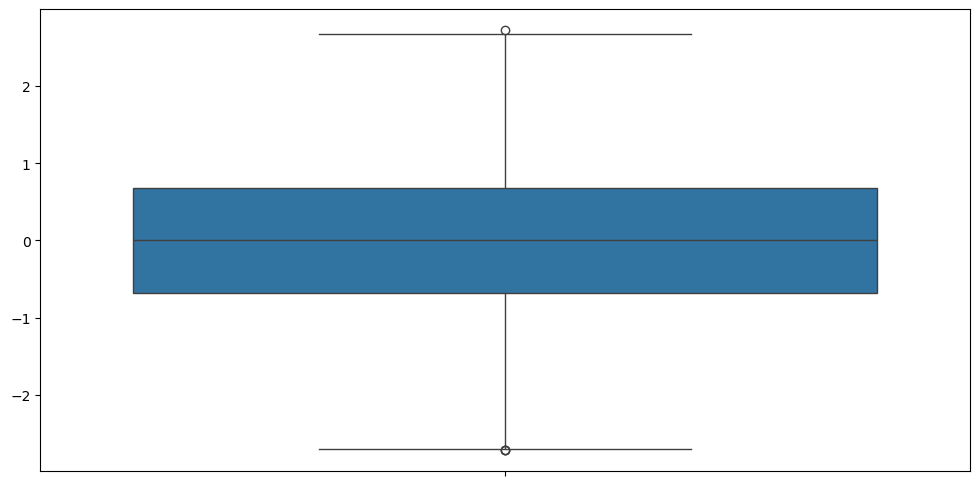

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(normal[(normal >= fence_low) & (normal <= fence_high)])